<div class="alert alert-block alert-info">
Visit the <a href="https://github.com/engs1258/biomedical-image-analysis-notebooks/wiki">wiki</a> pages to find some additional documentation and instructions on how view an interactive verson of these notebooks using binder.</div>

---


In [1]:
%matplotlib inline

In [2]:
import pydicom

import os
import numpy
import matplotlib.pyplot as plt

# Reading a DICOM image series using pydicom

Here we are using the [pydicom library!](https://pydicom.github.io/pydicom/stable/index.html#). Make sure you have this library installed as part of your local python installation. Otherwise run the following command: 

```
$ conda install -c conda-forge pydicom
```

This example has been adopted from [DICOM in Python!](https://pyscience.wordpress.com/2014/09/08/dicom-in-python-importing-medical-image-data-into-numpy-with-pydicom-and-vtk/) Tutorial. 

In [3]:
import pydicom.filereader


In [ ]:
#from pydicom.filereader import read_dicomdir

ImportError: cannot import name 'read_file' from 'pydicom.filereader' (/opt/homebrew/anaconda3/envs/biomedia-environment/lib/python3.14/site-packages/pydicom/filereader.py)

In [4]:
base_dir = '../images/Marching_Man/'

In [ ]:
PathDicom = '../images/Marching_Man/' #This directory stores the 3D scan as a list of seperate files, each file being a 2D slice
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

Now, lets get into the pydicom part of the code. A notable aspect of this package is that upon reading a DICOM file, it creates a dicom.dataset.FileDataset object where the different metadata are assigned to object attributes with the same name. We’ll see this below:

In [6]:
# Get ref file
RefDs = pydicom.dcmread(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

We simply use numpy.arange, ConstPixelDims, and ConstPixelSpacing to calculate axes for this array. Next, comes the last pydicom part:

In [7]:
x = numpy.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = numpy.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = numpy.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])

In [8]:
# The array is sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.dcmread(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  
    
ArrayDicom.shape

(256, 256, 93)

Now you can select the which slice should be plotted. As you can see the dataset has 93 slices

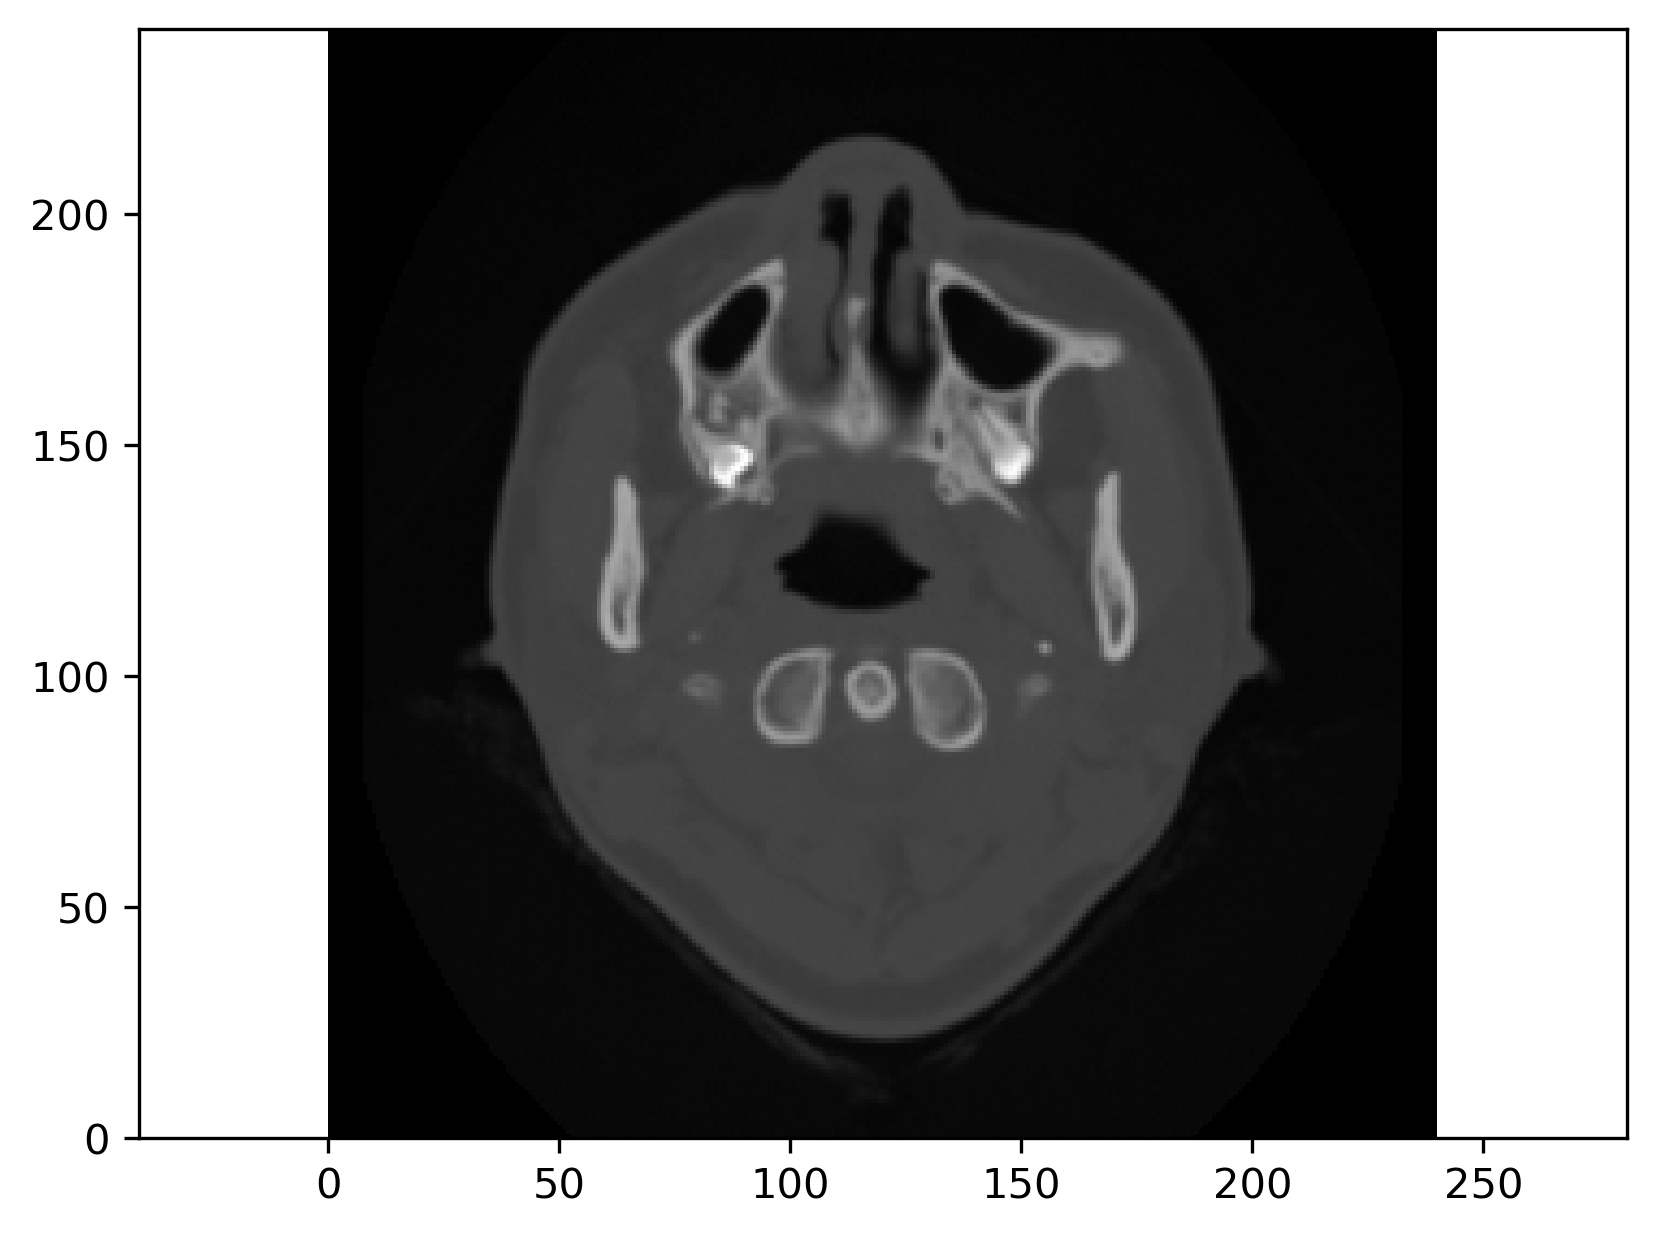

In [9]:
plt.figure(dpi=300)
plt.axes().set_aspect('equal', 'datalim')
plt.set_cmap(plt.gray())
plt.pcolormesh(x, y, numpy.flipud(ArrayDicom[:, :, 62]))

# Reading a DICOM image series using simpleITK

You can achive the same task using the [simpleITK library!](https://simpleitk.readthedocs.io/en/release/). Make sure you have this library installed as part of your local python installation. Otherwise run the following command:

```
$ conda install -c simpleitk simpleitk
```

In [10]:
import SimpleITK as sitk

In [11]:
reader = sitk.ImageSeriesReader()

In [12]:
dicom_names = reader.GetGDCMSeriesFileNames('../images/Marching_Man' )

In [13]:
reader.SetFileNames(dicom_names)

In [14]:
volume = reader.Execute()

ImageSeriesReader (0x1276064d0): Non uniform sampling or missing slices detected,  maximum nonuniformity:1.4837



Now convert the ITK volume into a numpy array

In [15]:
nda = sitk.GetArrayFromImage(volume)
nda.shape

(93, 256, 256)